## Example 2: regression

For the second example, we'll demonstrate a regression example, as well as a $k$-fold cross-validation. We'll use data on house prices and neighborhood characteristics from Boston, in the file *boston6k.csv*. Start by reading this data in, and take a quick look at the values:

In [5]:
import numpy as np
import pandas as pd

boston = pd.read_csv("../datafiles/boston6k.csv")

Load data

In [6]:
boston.head()

,ID,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Boston Allston-Brighton,74,1,-71.139367,42.362447,17.8,17.8,8.98296,0.0,...,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.60
1,2,Boston Allston-Brighton,74,2,-71.158552,42.353116,21.7,21.7,3.84970,0.0,...,1,0.77,6.395,91.0,2.5052,24,666,20.2,391.34,13.27
2,3,Boston Allston-Brighton,74,3,-71.168487,42.350608,22.7,22.7,5.20177,0.0,...,1,0.77,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
3,4,Boston Allston-Brighton,74,4,-71.156163,42.343818,22.6,22.6,4.26131,0.0,...,0,0.77,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
4,5,Boston Allston-Brighton,74,5,-71.155807,42.337318,25.0,25.0,4.54192,0.0,...,0,0.77,6.398,88.0,2.5182,24,666,20.2,374.56,7.79


Summary information

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWNNO   506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

Value 

In [8]:
boston.describe()

,ID,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,47.531621,2700.355731,-71.094343,42.360270,22.532806,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,146.213884,27.571401,1380.036830,0.125508,0.103696,9.197104,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,1.000000,0.000000,1.000000,-71.485152,42.045973,5.000000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,127.250000,26.250000,1303.250000,-71.156074,42.299922,17.025000,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,253.500000,42.000000,3393.500000,-71.088686,42.362347,21.200000,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,379.750000,78.000000,3739.750000,-71.031016,42.423070,25.000000,25.000000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,506.000000,91.000000,5082.000000,-70.680481,42.637086,50.000000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Matplotlib example - note the inline statement for jupyter

In [9]:
boston2 = boston.iloc[:,7:21]
boston2.columns

Index(['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

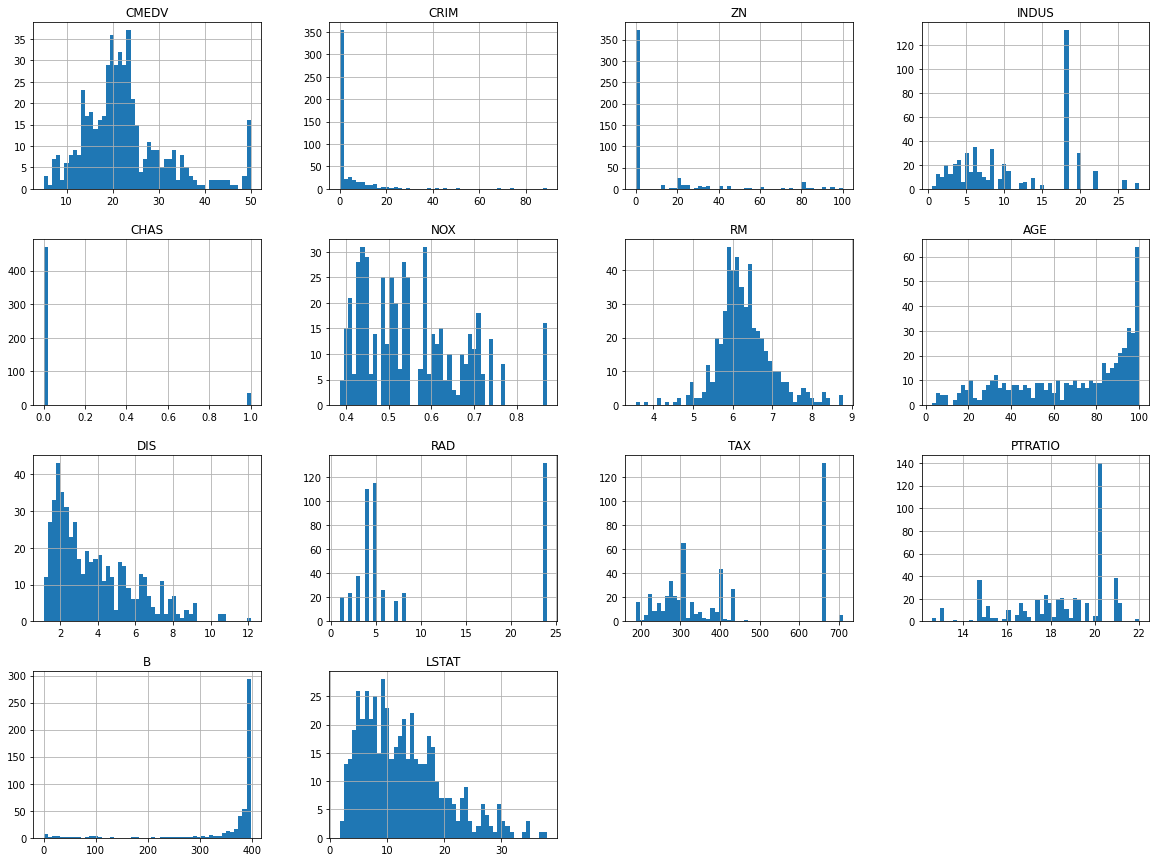

In [10]:
## %matplotlib inline
import matplotlib.pyplot as plt
boston2.hist(bins=50, figsize=(20,15))
plt.show()

Uses scikit to split data into training and test

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(boston2, test_size=0.2, random_state=42)

Split into features and labels

In [12]:
X_train = train.drop('CMEDV', axis=1).values
y_train = train['CMEDV'].values
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [13]:
X_test = test.drop('CMEDV', axis=1).values
y_test = test['CMEDV'].values
print(X_test.shape)
print(y_test.shape)

(102, 13)
(102,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
print(scaler.mean_)
print(np.sqrt(scaler.scale_))

[3.64850188e+00 1.12995050e+01 1.11347277e+01 7.42574257e-02
 5.54586139e-01 6.28753218e+00 6.85789604e+01 3.78350668e+00
 9.31188119e+00 4.05059406e+02 1.84210396e+01 3.61775916e+02
 1.25574010e+01]
[ 3.03163637  4.85881638  2.60725352  0.51204429  0.3427726   0.82121576
  5.3430648   1.43893625  2.93117272 12.89879379  1.4683956   9.10935061
  2.68610613]


In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(13,)),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

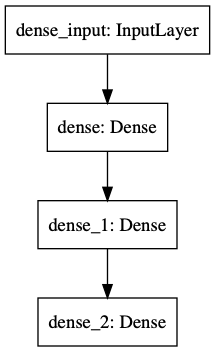

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Create a function to build the network architecture. This will allows us to recycle this in a cross-validation exercise.

In [19]:
def build_model():
    model = models.Sequential([                        

      layers.Dense(64, activation='relu', input_shape=(13,)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

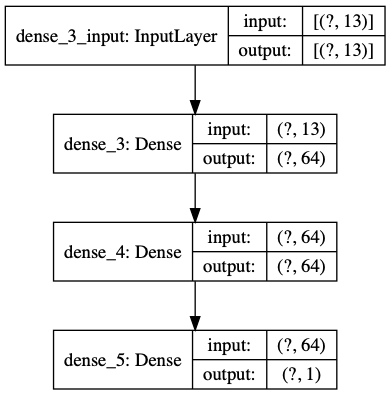

In [20]:
model = build_model()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

$k$-fold

In [21]:
## scikit learn method
k = 4
from sklearn.model_selection import KFold
kf = KFold(n_splits = k)

num_epochs = 250
all_mae_histories = []
i = 1
for train_partial_index, val_index in kf.split(X_train):
    print('processing fold #%d' % i)
    X_val = X_train[val_index]  
    y_val = y_train[val_index]
    
    X_partial_train = X_train[train_partial_index]
    y_partial_train = y_train[train_partial_index]
    
    model = build_model()                                                  

    history = model.fit(X_partial_train, y_partial_train,
                        validation_data=(X_val, y_val),
                        epochs=num_epochs, batch_size=16, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    i += 1

processing fold #1
processing fold #1
processing fold #1
processing fold #1


In [72]:
k = 4
num_val_samples = len(X_train) // k

num_epochs = 250
all_mae_histories = []
for i in range(k):
    print('processing fold #%d' % i)
    X_val = X_train[i * num_val_samples: (i + 1) * num_val_samples]  

    y_val = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    X_partial_train = np.concatenate(                                   
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    y_partial_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()                                                  

    history = model.fit(X_partial_train, y_partial_train,
                        validation_data=(X_val, y_val),
                        epochs=num_epochs, batch_size=16, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

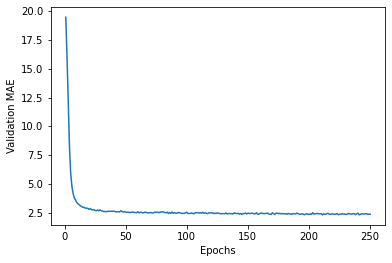

In [23]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

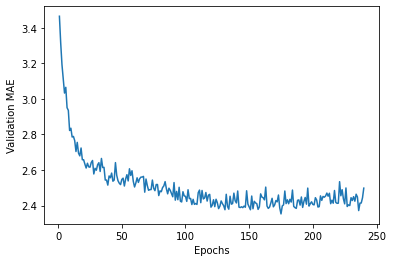

In [77]:
average_mae_history2 = average_mae_history[10:]
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [85]:
model = build_model()
history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=125, batch_size=16, verbose=1)

In [86]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)

In [88]:
test_mae_score

2.2378213